In [1]:
from __future__ import print_function
__author__= 'saraaita'

import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#Setting sample size array
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


## Normal Distribution

In [3]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['lnorm']

In [4]:
#Setting random values for Mean and Standard deviation as 100, and 1 respectively
loc = 100
scale = 0.9

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


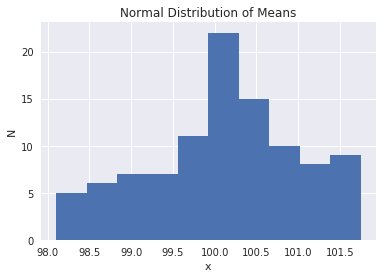

In [5]:
import numpy as np
md = {}

md['lnorm'] = np.random.normal(loc, scale, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['lnorm'])
pl.title('Normal Distribution of Means')
pl.ylabel('N')
pl.xlabel('x')

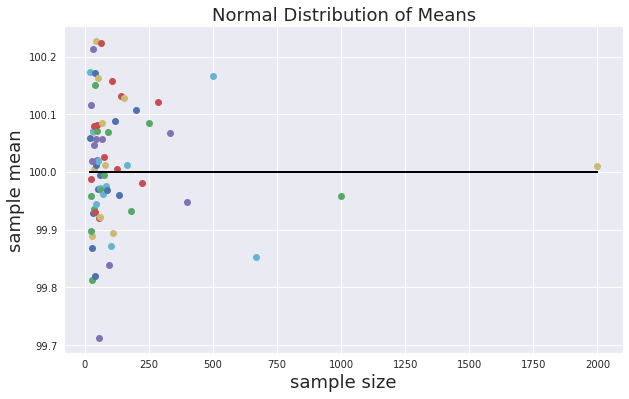

In [6]:
md['lnorm'] = {} 


for n in mysize:
    md['lnorm'][n] = np.random.normal(loc, scale, size=100)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal Distribution of Means', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [loc, loc], 'k')

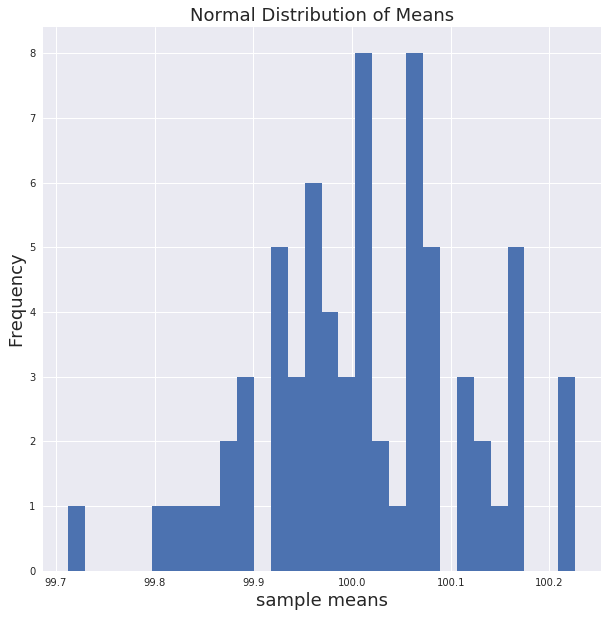

In [7]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Normal Distribution of Means', fontsize = 18)
pl.xlabel('sample means', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

## Poisson Distribution

In [8]:
# Poisson Distribution
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['pois']

In [9]:
lam = 100

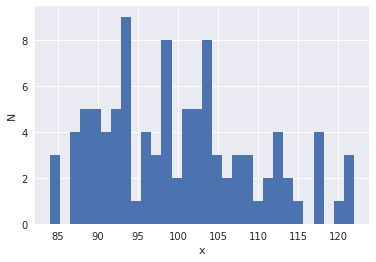

In [10]:
import numpy as np
pd = {}

pd['pois'] = np.random.poisson(lam, size=100)

pl.hist(pd['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [11]:
print ("pois mean: %.2f, standard deviation: %.2f"%(pd['pois'].mean(), pd['pois'].std()))

pois mean: 100.16, standard deviation: 9.44


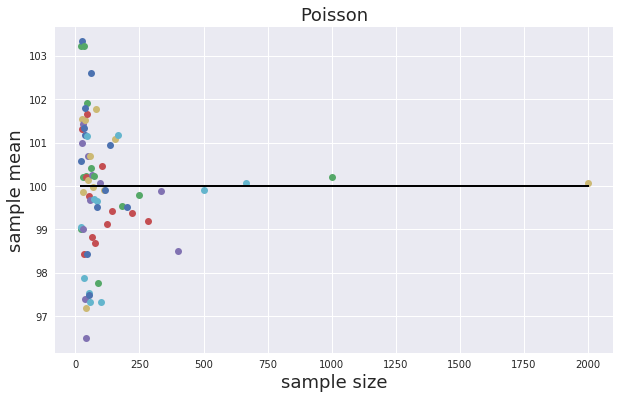

In [12]:
pd['pois'] = {} 

for n in mysize:
    pd['pois'][n] = np.random.poisson(lam, size=n)
    
# save the means for plotting later    

pd['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in pd['pois']:
    if not type(nn) == str:
        pd['pois']['means'][nn] = pd['pois'][nn].mean()
        
        axpois_mu_n.plot(nn, pd['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

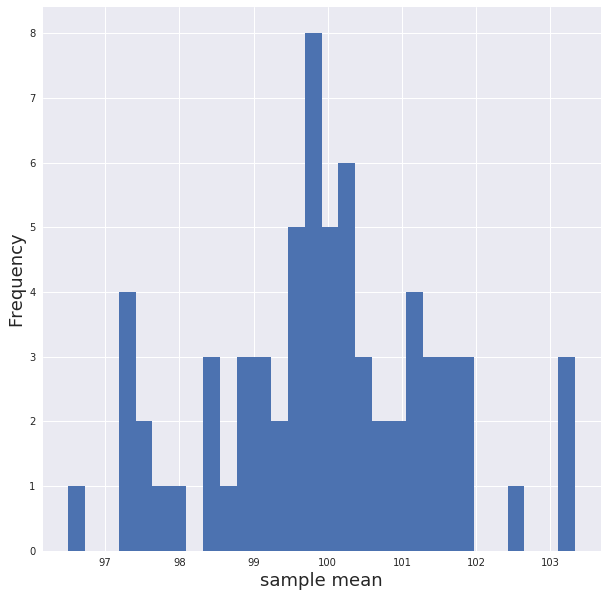

In [13]:

allmeans = list(pd['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

## Binomial Distribution

In [14]:
distribution = ['binomial']
x = 200
p = 0.5
m = x*p

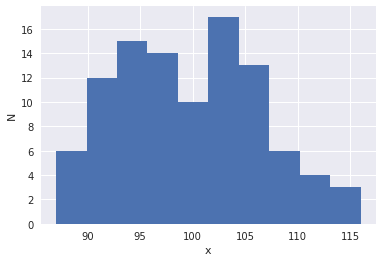

In [15]:
import numpy as np
bd = {}
bd['binomial'] = np.random.binomial(x, p, size=100)
pl.hist(bd['binomial'])
pl.ylabel('N')
pl.xlabel('x')

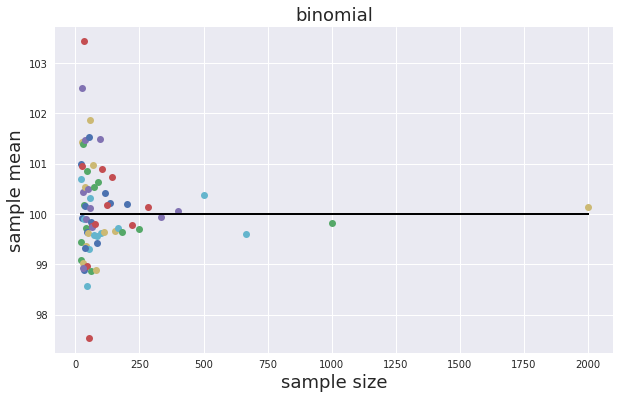

In [16]:
bd['binomial'] = {} 

for n in mysize:
    bd['binomial'][n] = np.random.binomial(x, p, size=n)
    
# save the means for plotting later    

bd['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in bd['binomial']:
    if not type(nn) == str:
        bd['binomial']['means'][nn] = bd['binomial'][nn].mean()
        
        axbinomial_mu_n.plot(nn, bd['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [m, m], 'k')

## CHI Square Distribution

In [17]:
distributions = ['chisq']
df = 100

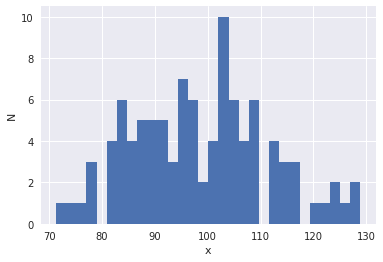

In [18]:
cd = {}

cd['chisq'] = np.random.chisquare(df, size=100)

pl.hist(cd['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [19]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(cd['chisq'].mean(), cd['chisq'].std()))

Chisq mean: 98.67, standard deviation: 12.63


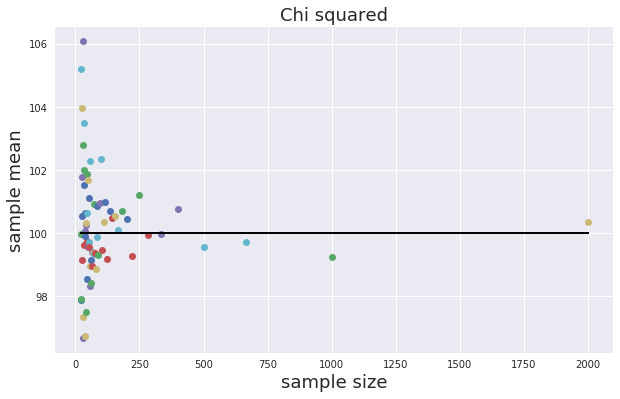

In [20]:
cd['chisq'] = {} 

for n in mysize:
    cd['chisq'][n] = np.random.chisquare(df, size = n)
    
cd['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in cd['chisq']:
    if not type(nn) == str:
        cd['chisq']['means'][nn] = cd['chisq'][nn].mean()
        
        axchisq_mu_n.plot(nn, cd['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## Logistic Distribution

In [21]:
distributions = ['logistic']

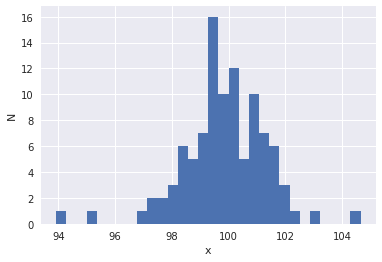

In [22]:
td = {}

td['logistic'] = np.random.logistic(loc, scale, size=100)

pl.hist(td['logistic'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

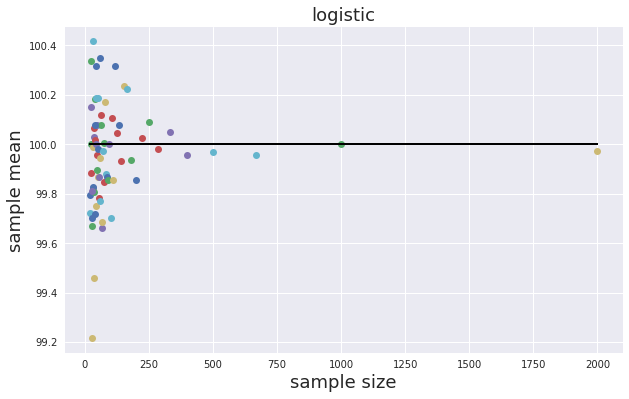

In [23]:
td['logistic'] = {} 

for n in mysize:
    td['logistic'][n] = np.random.logistic(loc, scale, size = n)
    
td['logistic']['means'] = {}
axst_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in td['logistic']:
    if not type(nn) == str:
        td['logistic']['means'][nn] = td['logistic'][nn].mean()
        
        axst_mu_n.plot(nn, td['logistic']['means'][nn], 'o')
        axst_mu_n.set_xlabel('sample size', fontsize=18)
        axst_mu_n.set_ylabel('sample mean', fontsize=18)
        axst_mu_n.set_title('logistic', fontsize=18)
        axst_mu_n.plot([min(mysize), max(mysize)], [loc, loc], 'k')

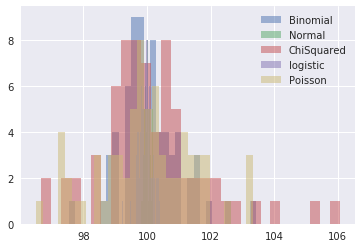

In [24]:
pl.hist(bd['binomial']['means'].values(),bins=30, alpha=0.5, label = 'Binomial')
pl.hist(md['lnorm']['means'].values(),bins=30, alpha=0.5, label = 'Normal')
pl.hist(cd['chisq']['means'].values(),bins=30, alpha=0.5, label = 'ChiSquared')
pl.hist(td['logistic']['means'].values(),bins=30, alpha=0.5, label = 'logistic')
pl.hist(pd['pois']['means'].values(),bins=30, alpha=0.5, label ='Poisson')
pyplot.legend(loc= 'upper right')